### Важно:
Пожалуйста, поддерживайте ваш код в хорошем состоянии, пишите комментарии, убирайте бесполезные ячейки, пишите модели в специально отведенных модулях. Проверяющие могут **НА СВОЕ УСМОТРЕНИЕ** снижать баллы за:

1. Говнокод
2. Неэффективные решения
3. Вермишель из ячеек в тетрадке
4. Все остальное что им не понравилось

#### (0 - 0.05 балла):

За использование логгеров типа wandb/comet/neptune и красивую сборку этой домашки в виде графиков/картинок в этих логгерах мы будем выдавать бонусные баллы.

Решением домашки является архив с использованными тетрадками/модулями, а так же **.pdf** файл с отчетом по проделанной работе по каждому пункту задачи. В нем необходимо описать какие эксперименты вы производили чтобы получить результат который вы получили, а так же обосновать почему вы решили использовать штуки которые вы использовали (например, дополнительные лоссы для стабилизации, разные виды потоков, разные хаки для вае)


In [1]:
import os

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from tqdm import tqdm_notebook as tqdm

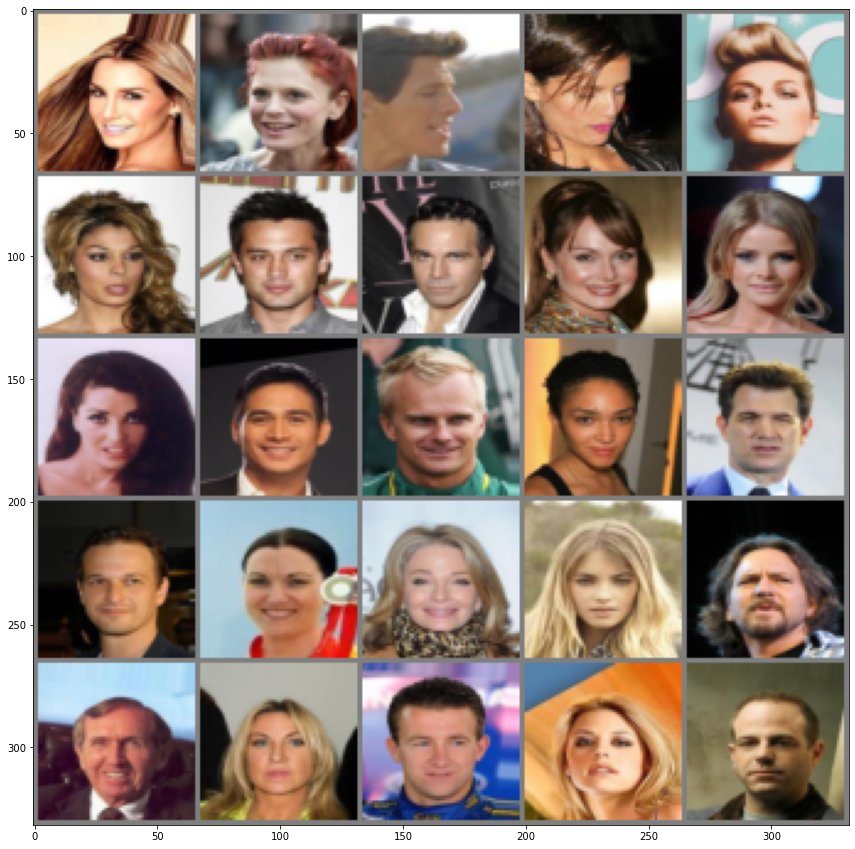

In [4]:
batch_size = 64
device = 'cuda' if torch.cuda.is_available() else 'cpu'

celeba_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
    


full_dataset = torchvision.datasets.CelebA('./celeba/',
                                           transform=celeba_transforms,
                                           download=False)

dataloader = torch.utils.data.DataLoader(dataset=full_dataset,
                                         batch_size=64,
                                         shuffle=True,
                                         drop_last=True)

plt.figure(figsize=(15,15))
plt.imshow(make_grid([full_dataset[i][0] for i in range(25)], nrow=5).permute(1,2,0) * 0.5 + 0.5)
plt.show()

В этой домашней работе вам предлагается повторить результаты статьи VAE+NF (https://arxiv.org/pdf/1611.05209.pdf).

Основная часть домашнего задания - чтение статьи и повторение результатов, поэтому обязательно прочитайте не только ее, но и другие основные статьи про потоки того времени:

1. https://arxiv.org/abs/1505.05770
2. https://arxiv.org/abs/1605.08803
3. https://arxiv.org/abs/1705.07057
4. http://arxiv.org/abs/1807.03039




### Задача 1 (0.1 балла, но если не сделаете, за всю домашку ноль):

Для начала предлагаю попробовать обучить обычный VAE на Celeba до нормального качества, померить FID и запомнить для будущего сравнения


### Задача 2 (0.3 балла, но если не сделаете, за всю домашку max 0.1 за прошлый пункт):

После этого попробуем обучить обычный NF на Celeba до нормального качества, померить FID и запомнить для будущего сравнения

В качестве потока можно использовать все что вы хотите, Coupling/Autoregressive/Linear слои, любые трансформации. 

Можно использовать как и сверточные потоки, так и линейные (развернув селебу в один вектор)

### Задача 3 (0.6 балла):

Попробуйте повторить архитектуру VAPNEV из https://arxiv.org/pdf/1611.05209.pdf. Сравните качество (FID) между тремя разными моделями

Здесь вы можете использовать VAE и NF из предыдущих пунктов, необходимо только понять как они совмещаются в оригинальной статье

В отчете напишите, почему по вашему мнению такой подход будет лучше (или может быть хуже) чем обычный VAE?



### Бонусная задача (0.2 балла):

Найдите, реализуйте и сравните с предыдущими моделями еще один интересный способ совмещения NF и VAE

##### Подсказки:

1. Если вы учите на колабе или на наших машинках, вероятнее всего что обучение будет очень долгим на картинках 256х256. Никто не мешает уменьшить разрешение, главное чтобы было видно что генерация выучились и качество было ок

2. Вы можете сделать ваш VAE/NF/VAPNEV условным, придумав как вы будете передавать в него conditional аттрибуты селебы

3. Не забывайте про аугментации


